<a href="https://colab.research.google.com/github/FelixCinq-Mars/Frisbee-Flight-Model/blob/main/Project_1_F%C3%A9lix_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro to Computer Programming in Engineering and Science 360-420-DW sec.00002 

###Project 1 Report - Frisbee Flight Model
 
Friday, April 16, 2021


**Félix Cinq-Mars**



Teachers: J.F. Brière, J. Sumner


##  I. Introduction
In this project, we explore a basic model of a frisbee's trajectory. When thrown in the air, a frisbee is affected by many factors such as gravitational, lift and drag forces. Inclination angle, velocity angle, and initial speed of the frisbee have also to be taken into account. The built model, which contains numerical methods, serves to help us solve some problems. Here, we try to find how the inclination angle of the frisbee has to be set up for the frisbee to land at a desired distance of 15 meters for a given initial speed of 12 m/s.

##  II. Theory
The frisbee has many angles we have to consider to plot its trajectory. There is the inclination angle of the frisbee, defined as beta, the velocity angle, theta, and the angle of attack, alpha (=beta-theta). Beta stays constant as we assume that the inclination of the frisbee will stay constant throughout the motion. Theta and alpha change throughout the model as the velocity changes direction. 

During its flight, the fribee experiences several forces that enables it to fly and fall down. There is, of course, the gravitational force that pulls down the frisbee. The forces due to the contact with air are the drag force, which is the force parallel to the flow of air, and the lift force, which is the force perpendicular to the flow of air. These are calculated with the empirical values of lift and drag coefficients. The variation of the
drag and lift coefficients as the angle of attack, in radians, varies has been established by studies made in wind tunnels. The drag and lift forces will change over time as the angle attack and the velocity change. These forces are also defined by the frisbee's mass and cross section area that stay constant.

Using Newton's second law, we get the sum of the x and y component forces exerted on the frisbee. With algebric manipulation, we obtain differential equations that will enable us to solve the addressed problem with Euler's Method and the Bisection Method.    

## III. Numerical Methods
After obtaining the differential equations, we can take the two second-order equations of motion and express them as two system of two first-order equations. Using Euler's method, we can solve those four first-order equations.
The equations are composed of values of acceleration, velocity, position and time step. The low time step chosen allows us to have accuracy between the points of the plot and to set very large arrays to plot the positions and velocities of the frisbee in space. Then, we can plot the trajectory using arrays and while loops.

To solve our problem using the bisection method, we first plot the range of the frisbee in variation to the inlclination of the frisbee, beta. Then, we create a function called function_bisect() that takes as input beta. It is similar to the plot of range in variation to beta except the function returns the range substracted by the desired range which is 15 meters. This allows us to use the bisection method that finds the roots for this desired range.

Next, we define a function called bisection_method() that takes as input x1, x2, and tolerance. x1 and x2 is the interval in which we want to find the root. Since the parabola has two roots for the target range, we use our bisection function twice with one interval going from 1 to 10 degrees and the other going from 10 to 34 degrees. This is followed to make sure we find the two roots present in the plot. We choose a tolerance of 10**(-8) to have the more efficicent convergence possible. The function returns xMid which is the root when convergence is reached.

## IV. Validation
The model is valid due to its accurate trajectory plot and range versus inclination angle plot. We verify our results using scipy's optmize.bisect and we find that our results obtained from our functions of the bisection method is very similar to scipy optimize results. This validates the accuracy of our model and of our results. Additionally, when we recompute the roots found into the function function_bisect() we see that the returned ranges are very close to 0, which confirms that our funtions can find the roots for a desired range. Also, we can confirm the accuracy of our results by simply looking at our range vs inclination angle plot and notice that the angles found correspond to that of the desired range.   

##  V. Discussion
The results obtained allow to answer the addressed question: for a given initial speed of 12 m/s, what should be the initial inclination of the frisbee so that it lands after travelling exactly 15 meters? Indeed, through all the pieces, functions, and loops of our model, we find that the inclination angle of the frisbee has to be set up either at 2.76 degrees or 23.59 degrees roughly for the frisbee to land at 15 meters from its starting position. This is interesting because it means that we can throw the frisbee at two different angles and it will still land at the exact same spot. It also demonstrates how the angle inclination angle of a frisbee is essential when graphing the trajectory of one object. In one case, the angle is low, which does not provide a great height for the frisbee during its flight but there is less air resistance for the frisbee to slow down. In the other case, the angle is high which provides height for the frisbee but also great air resistance which slows down the frisbee. These results are validated using scipy's optimize.bisect function. The built model can serve us to find other inclination angles depending on other desired ranges. In brief, our model successfully answers the problem's question by accurately finding the frisbee's inclination angles 2.76 degrees and 23.59 degrees for the frisbee to land at 15 meters.

##  Level One: Solving ODEs
How does the initial inclination of the frisbee affect the max height reached? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.

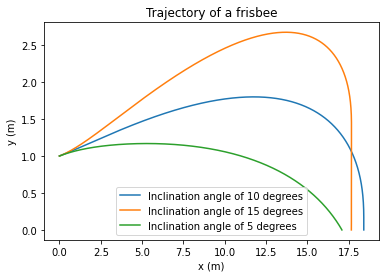

In [ ]:
#Project - Frisbee Flight Model

#Level One : Solving ODEs
#Question: How does the initial inclination of the frisbee affect the max height reached?

import numpy as np
import matplotlib.pyplot as plt
import math as mt

#Defining values and arrays.
TMAX = 20.   # End time of simulation
DT = 0.001  # Time step
STEPS = int((TMAX/DT))  #Total number of time steps

g = 9.80   #Gravitational acceleration in m/s**2
Vi = 12   #Initial value of the velocity in m/s
THETA = 5*mt.pi/180    #Angle of the velocity vector in radians
BETA = 10*mt.pi/180   #Inclination of the frisbee in radians
ALPHA = BETA - THETA   #Angle of attack in degrees
m = 0.175   #Mass of the frisbee in kg
r = 0.135   #Radius of the frisbee in m
PHI = 1.23   #Air density in kg/m**3

A = mt.pi * r ** 2    #Cross section of the frisbee in m**2
Cl = 0.13 + 3.09 * ALPHA     #Initial coefficient of drag force
Cd = 0.085 + 3.30 * (ALPHA - (-0.052))**2    #Initial coefficient of lift force

y = np.zeros(STEPS)   # Array with values of position on y_axis
x = np.zeros(STEPS)   # Array with values of position on x_axis
Vx = np.zeros(STEPS)  # Array with values of velocity on x-axis
Vy = np.zeros(STEPS)  # Array with values of velocity on y-axis

y[0] = 1.00    # Initial value of position on y_axis in m
x[0] = 0    # Initial value of position on x_axis in m
Vy[0] = mt.sin(THETA) * Vi    # Initial value of velocity on y-axis in m/s
Vx[0] = mt.cos(THETA) * Vi    # Initial value of velocity on x-axis in m/s

#Variation 1
#Euler's Differential Equations and Loop.
i = 1
while y[i-1] >= 0:

  Vx[i] = Vx[i-1] + ((PHI * A)/(2 * m) * (- Cl * Vy[i-1]**2 - Cd * Vx[i-1]**2)) * DT
  Vy[i] = Vy[i-1] + ((PHI * A)/(2 * m) * (Cl * Vx[i-1]**2 - Cd * Vy[i-1]**2) - g) * DT

  x[i] = x[i-1] + Vx[i-1] * DT
  y[i] = y[i-1] + Vy[i-1] * DT

  THETA = mt.atan(Vy[i]/Vx[i])   #New angle of the velocity vector in radians
  ALPHA = BETA - THETA   #New angle of attack in degrees
  Cl = 0.13 + 3.09 * ALPHA     #New coefficient of drag force
  Cd = 0.085 + 3.30 * (ALPHA + 0.052)**2    #New coefficient of lift force

  if y[i] <= 0:     # This is to stop plotting when y = 0 ,i.e. when the frisbee hits the ground
    x[i] = x[i-1]
    y[i] = 0

  i += 1

#Plotting y as a function of x
plt.title('Trajectory of a frisbee')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.plot(x,y,label='Inclination angle of 10 degrees')  #1st plot

#Variation 2 - Inclination Angle at 15 degrees
THETA = 5*mt.pi/180    #Angle of the velocity vector in radians
BETA = 15*mt.pi/180   #Inclination of the frisbee in radians
ALPHA = BETA - THETA   #Angle of attack in degrees
Cl = 0.13 + 3.09 * ALPHA     #Initial coefficient of drag force
Cd = 0.085 + 3.30 * (ALPHA - (-0.052))**2    #Initial coefficient of lift force

y = np.zeros(STEPS)   # Array with values of position on y_axis
x = np.zeros(STEPS)   # Array with values of position on x_axis
Vx = np.zeros(STEPS)  # Array with values of velocity on x-axis
Vy = np.zeros(STEPS)  # Array with values of velocity on y-axis

y[0] = 1.00    # Initial value of position on y_axis in m
x[0] = 0    # Initial value of position on x_axis in m
Vy[0] = mt.sin(THETA) * Vi    # Initial value of velocity on y-axis in m/s
Vx[0] = mt.cos(THETA) * Vi    # Initial value of velocity on x-axis in m/s

i = 1
while y[i-1] >= 0:

  Vx[i] = Vx[i-1] + ((PHI * A)/(2 * m) * (- Cl * Vy[i-1]**2 - Cd * Vx[i-1]**2)) * DT
  Vy[i] = Vy[i-1] + ((PHI * A)/(2 * m) * (Cl * Vx[i-1]**2 - Cd * Vy[i-1]**2) - g) * DT

  x[i] = x[i-1] + Vx[i-1] * DT
  y[i] = y[i-1] + Vy[i-1] * DT

  THETA = mt.atan(Vy[i]/Vx[i])   #New angle of the velocity vector in radians
  ALPHA = BETA - THETA   #New angle of attack in degrees
  Cl = 0.13 + 3.09 * ALPHA     #New coefficient of drag force
  Cd = 0.085 + 3.30 * (ALPHA + 0.052)**2    #New coefficient of lift force

  if y[i] <= 0:         #This is to stop plotting when y = 0 ,i.e. when the frisbee hits the ground.
    x[i] = x[i-1]
    y[i] = 0

  i += 1

plt.plot(x,y,label='Inclination angle of 15 degrees')  #2nd plot


#Variation 3 - Inclination Angle at 5 degrees
THETA = 5*mt.pi/180    #Angle of the velocity vector in radians
BETA = 5*mt.pi/180   #Inclination of the frisbee in radians
ALPHA = BETA - THETA   #Angle of attack in degrees
Cl = 0.13 + 3.09 * ALPHA     #Initial coefficient of drag force
Cd = 0.085 + 3.30 * (ALPHA - (-0.052))**2    #Initial coefficient of lift force

y = np.zeros(STEPS)   # Array with values of position on y_axis
x = np.zeros(STEPS)   # Array with values of position on x_axis
Vx = np.zeros(STEPS)  # Array with values of velocity on x-axis
Vy = np.zeros(STEPS)  # Array with values of velocity on y-axis

y[0] = 1.00    # Initial value of position on y_axis in m
x[0] = 0    # Initial value of position on x_axis in m
Vy[0] = mt.sin(THETA) * Vi    # Initial value of velocity on y-axis in m/s
Vx[0] = mt.cos(THETA) * Vi    # Initial value of velocity on x-axis in m/s

i = 1
while y[i-1] >= 0:

  Vx[i] = Vx[i-1] + ((PHI * A)/(2 * m) * (- Cl * Vy[i-1]**2 - Cd * Vx[i-1]**2)) * DT
  Vy[i] = Vy[i-1] + ((PHI * A)/(2 * m) * (Cl * Vx[i-1]**2 - Cd * Vy[i-1]**2) - g) * DT

  x[i] = x[i-1] + Vx[i-1] * DT
  y[i] = y[i-1] + Vy[i-1] * DT

  THETA = mt.atan(Vy[i]/Vx[i])   #New angle of the velocity vector in radians
  ALPHA = BETA - THETA   #New angle of attack in degrees
  Cl = 0.13 + 3.09 * ALPHA     #New coefficient of drag force
  Cd = 0.085 + 3.30 * (ALPHA + 0.052)**2    #New coefficient of lift force

  if y[i] <= 0:
    x[i] = x[i-1]
    y[i] = 0

  i += 1

plt.plot(x,y,label='Inclination angle of 5 degrees')  #3rd plot


plt.legend()


The plot above demonstrates that the frisbee's inclination angle, which stays constant throughout the model, is directly proportional to the maximum height reached by the frisbee. As the inclination angle increases, the maximum height increases and as the inclination angle decreases, the maximum height decreases.

## Level Two: Solving the ODEs and using bisection methods to solve a boundary-value problem
For a given initial speed, what should be the initial inclination of the frisbee so that it lands after travelling exactly D meters (say 15 meters)?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in double_scalars


For the frisbee to land at 15 meters, the inclination angles should be 2.762290288665099 degrees or 23.597713730763644 degrees.
0.004941296765165859 and 0.007966782072001521 are the function results of the roots. Since they are very close to 0, they confirm that the results found are really roots.
Using scipy optimize, we can see that the angles are 2.7622902885912026 and 23.59771373126705 degrees, which is very close to those found.


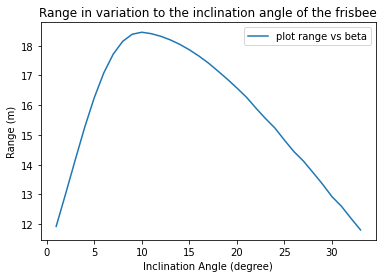

In [ ]:
#Project - Frisbee Flight Model

#Level Two : Solving ODEs and using bisection methods to solve a boundary-value problem
#Question: For a given initial speed, what should be the initial inclination of the frisbee so that it lands after travelling exactly D meters (say 15 meters)?

import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import optimize

#Defining values and arrays.
TMAX = 20.   # End time of simulation.
DT = 0.001  # Time step.
STEPS = int((TMAX/DT))  #Total number of time steps.

g = 9.80   #Gravitational acceleration in m/s**2.
Vi = 12   #Initial value of the speed in m/s.

Target_Range = 15    #Target 'D' range in m.

#BETA =  Inclination of the frisbee in radians.
#BETA - THETA   Angle of attack in radians.
m = 0.175   #Mass of the frisbee in kg.
r = 0.135   #Radius of the frisbee in m.
PHI = 1.23   #Air density in kg/m**3.
A = mt.pi * r ** 2    #Cross section of the frisbee in m**2.

BETA_arr = np.zeros(33)   #Array with values of inclination angles.
xRange = np.zeros(33)   #Array with values of range distances.
#The length of the arrays above are 33 because from 0 to 33 degrees, the parabola of the graph goes up
#and back down to the initial range at 0 degrees.

BETA_arr[0] = 0   #Initial inclination angle.

#Euler's Differential Equations and Loop to plot Range vs Beta.
t = 0
while t < 33:  #This first loop serves to update the inclination angle and reset all arrays and changed variables to their initial values to go through the seond loop.
  i = 1
  THETA = 5*mt.pi/180   # Velocity angle in radians.
  y = np.zeros(STEPS)   # Array with values of position on y_axis.
  x = np.zeros(STEPS)   # Array with values of position on x_axis.
  Vx = np.zeros(STEPS)  # Array with values of velocity on x-axis.
  Vy = np.zeros(STEPS)  # Array with values of velocity on y-axis.
  y[0] = 1.00    # Initial value of position on y_axis in m.
  x[0] = 0    # Initial value of position on x_axis in m.
  Vy[0] = mt.sin(THETA) * Vi    # Initial value of velocity on y-axis in m/s.
  Vx[0] = mt.cos(THETA) * Vi    # Initial value of velocity on x-axis in m/s.

  while y[i-1] >= 0:   #This second loop allows us to compute the trajectory of the frisbee and to return the x-axis range for each updated inclination angle. 
    
    Cl = 0.13 + 3.09 * (mt.radians(BETA_arr[t-1]) - THETA)     #New coefficient of drag force.
    Cd = 0.085 + 3.30 * ((mt.radians(BETA_arr[t-1]) - THETA) + 0.052)**2    #New coefficient of lift force.

    Vx[i] = Vx[i-1] + ((PHI * A)/(2 * m) * (- Cl * Vy[i-1]**2 - Cd * Vx[i-1]**2)) * DT
    Vy[i] = Vy[i-1] + ((PHI * A)/(2 * m) * (Cl * Vx[i-1]**2 - Cd * Vy[i-1]**2) - g) * DT

    x[i] = x[i-1] + Vx[i-1] * DT
    y[i] = y[i-1] + Vy[i-1] * DT

    THETA = mt.atan(Vy[i]/Vx[i])   #New angle of the velocity vector in radians.

    if y[i] <= 0:      #This is to stop plotting when y = 0 ,i.e. when the frisbee hits the ground.
      x[i] = x[i-1]
      y[i] = 0

    i += 1
  xRange[t] = x[i-7]         #Filling up the array with the various range distances from the updated Beta.
  #The range is determined from x[i-7] because if I do x[i-1] it gives large negative numbers and messes up the graph for some reason I do not know.
  #However, x[i-7] correctly gives me the range for each angle even if it is 7 spots before the end of the x array. 
  BETA_arr[t] = BETA_arr[t-1] + 1   #Updating the inclination angle and filling up the array. 
  t += 1

#Plotting y as a function of x.
plt.title('Range in variation to the inclination angle of the frisbee')
plt.xlabel('Inclination Angle (degree)')
plt.ylabel('Range (m)')
plt.plot(BETA_arr,xRange,label='plot range vs beta')    #Plot to observe the range in variation to the inclination angle beta. 
plt.legend()


#Defining Functions for use of the Bisection Method.
def function_bisect(beta):
  #Euler's Differential Equations and loop to plot Range vs Beta.
  i = 1
  THETA = 5*mt.pi/180   # Angle of attack in radians.
  y = np.zeros(STEPS)   # Array with values of position on y_axis.
  x = np.zeros(STEPS)   # Array with values of position on x_axis.
  Vx = np.zeros(STEPS)  # Array with values of velocity on x-axis.
  Vy = np.zeros(STEPS)  # Array with values of velocity on y-axis.
  y[0] = 1.00    # Initial value of position on y_axis in m.
  x[0] = 0    # Initial value of position on x_axis in m.
  Vy[0] = mt.sin(THETA) * Vi    # Initial value of velocity on y-axis in m/s.
  Vx[0] = mt.cos(THETA) * Vi    # Initial value of velocity on x-axis in m/s.

  while y[i-1] >= 0:   #This second loop allows us to compute the trajectory of the frisbee and to return the x-axis range for each updated inclination angle. 
    
    Cl = 0.13 + 3.09 * (mt.radians(beta) - THETA)     #New coefficient of drag force.
    Cd = 0.085 + 3.30 * ((mt.radians(beta) - THETA) + 0.052)**2    #New coefficient of lift force.

    Vx[i] = Vx[i-1] + ((PHI * A)/(2 * m) * (- Cl * Vy[i-1]**2 - Cd * Vx[i-1]**2)) * DT
    Vy[i] = Vy[i-1] + ((PHI * A)/(2 * m) * (Cl * Vx[i-1]**2 - Cd * Vy[i-1]**2) - g) * DT

    x[i] = x[i-1] + Vx[i-1] * DT
    y[i] = y[i-1] + Vy[i-1] * DT

    THETA = mt.atan(Vy[i]/Vx[i])   #New angle of the velocity vector in radians.

    if y[i] <= 0:      #This is to stop plotting when y = 0 ,i.e. when the frisbee hits the ground.
      x[i] = x[i-1]
      y[i] = 0

    i += 1
  return x[i-7] - Target_Range    #Computed range substracted by the desired range to be aligned on the x-axis line,so tofind the roots using the bisection method in the next function below.

def bisection_method(x1,x2,tolerance):
  while (abs(x1-x2)/max(1,x2)) > tolerance:  #Setting a condition for the convergence to be reached.
    xMid = (1/2) * (x2 + x1)    #Calculating the midpoint between x1 and x2.

    if function_bisect(xMid) * function_bisect(x2) < 0: #If the product of the functions at xMid and x2 is less than zero, then the functions at these points have a different sign. 
      x1 = xMid    #Then, the midpoint becomes x1.

    else: #In this case, if the product of the functions at xMid and x2 is more than zero, then the functions at these points have a same sign.  
      x2 = xMid     #Then, the midpoint becomes x2.

  return xMid

first_angle = bisection_method(0,10,10**(-10))    #Here, we use the bisection method for two intervals since we know there is two roots for the desired range.
second_angle = bisection_method(10,34,10**(-10))  #The first interval ends and the second interval at 10 because we can see in the graph that 10 is approximatively the peak of the parabola.
#And, we want to make sure we find the two roots present in the plot.
#We use a tolerance of 10**(-10) to have the most accurate convergence.
print('For the frisbee to land at',Target_Range,'meters, the inclination angles should be',first_angle,'degrees or',second_angle,'degrees.')
print(function_bisect(first_angle),'and',function_bisect(second_angle),'are the function results of the roots. Since they are very close to 0, they confirm that the results found are really roots.')
#First verification of the results as being real roots.

first_root = optimize.bisect(function_bisect,0,10)     #Second verification of the results using scipy optimize.
second_root = optimize.bisect(function_bisect,10,34)
print('Using scipy optimize, we can see that the angles are',first_root,'and',second_root,'degrees, which is very close to those found.')
